<a href="https://colab.research.google.com/github/dTony33/Machine-Learning/blob/main/Bonus_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Questions 1-3



PDF for 
[Questions from 1-3](https://github.com/dTony33/Machine-Learning/blob/main/bonus%20assignment.pdf)


In [7]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from scipy import misc
img = cv2.imread('/content/input.png') 
# img=img/255
height, width, channels = np.shape(img)


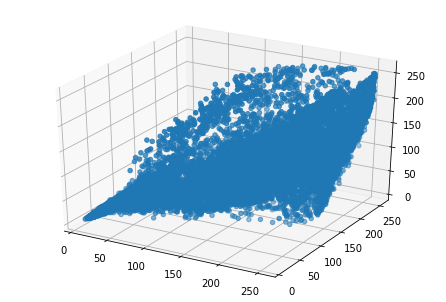

In [4]:
from mpl_toolkits.mplot3d import Axes3D
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

128 128 3


TypeError: ignored

In [6]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
def kmeans():
  